In [2]:
# Import liberaries 
import torch
import torch.nn as nn

from torch.utils.data import DataLoader, Dataset

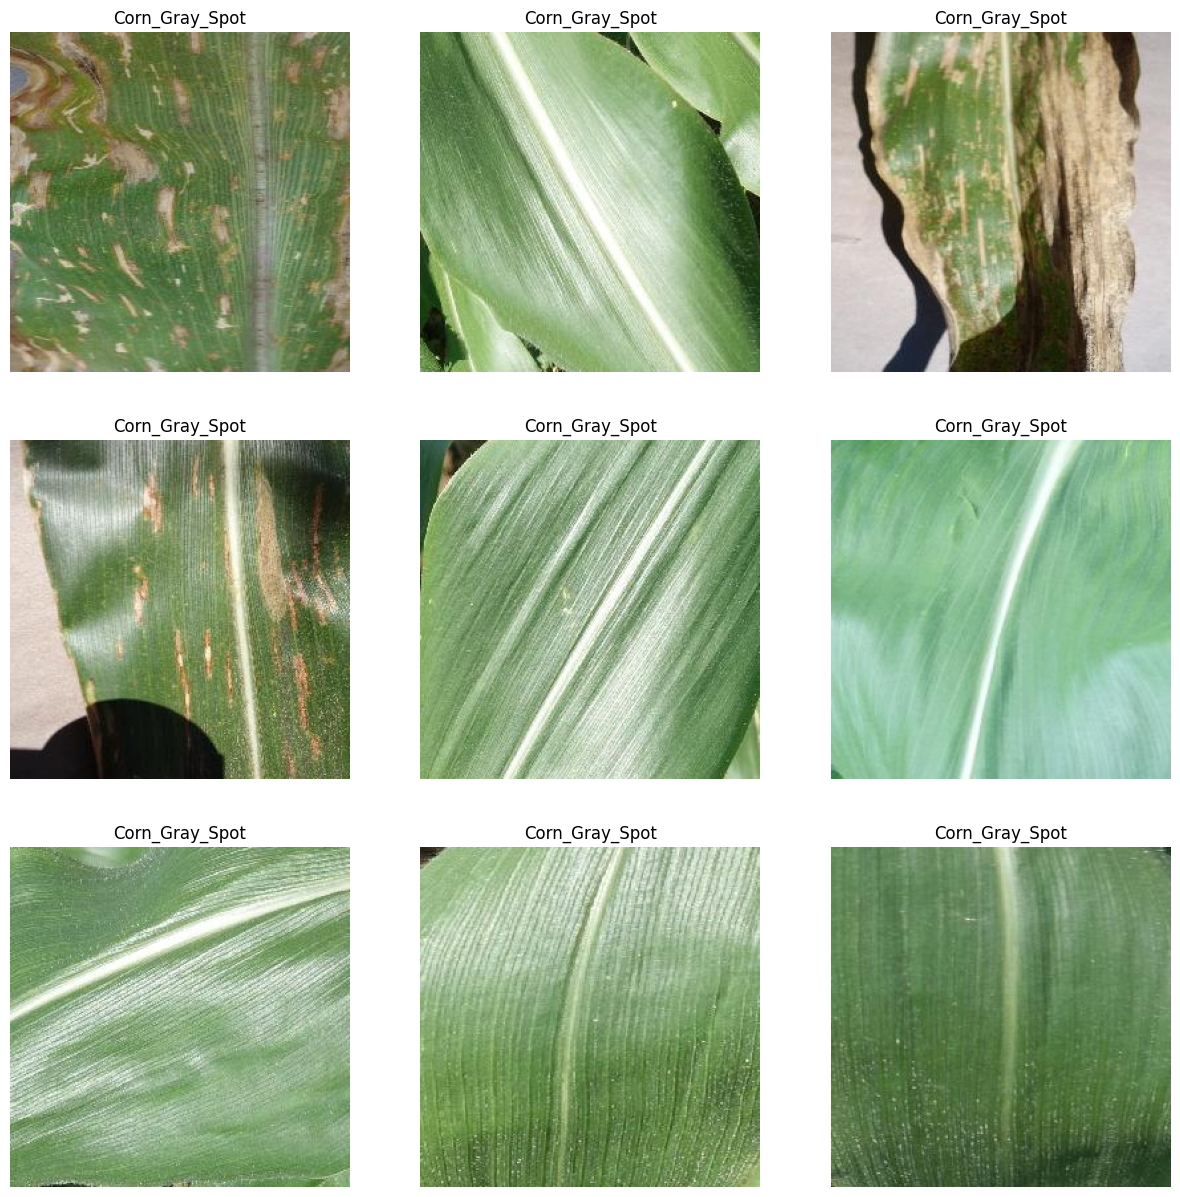

In [3]:
# visulaise the data
import os
import matplotlib.pyplot as plt
import random
from glob import glob
import cv2 

img_dir = "Dataset/data/Task A/train"
def visulise_img(img_dir):
    fig = plt.figure(figsize=(15 , 15))
    
    row, col = 3 ,3 
    img_list = random.sample(glob(img_dir + "/*/*.jpg"), k = row*col)
    
    for i in range (row*col ):  
        # img_path = random.sample(glob(img_dir + "/*/*.jpg"), k = 1)
        
        img = cv2.imread(img_list[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
     
        fig.add_subplot(row , col , i+1)
        plt.imshow(img)
        plt.title(img_list[0].split("\\")[2].split(" ")[0])
        plt.axis(False)

visulise_img(img_dir)

In [60]:
def find_classes(tagert_dir):
    if os.listdir(tagert_dir) is None:
        print("Cant return anything")
        return None
    else:
        classes = os.listdir(tagert_dir)
        cls_to_idx = dict(enumerate(classes , 0))
        cls_to_idx = {k:v for v,k in cls_to_idx.items()}
    return classes , cls_to_idx

In [77]:
# Import the classes 
from PIL import Image

class CustomeData(Dataset):
    def __init__(self, taget_dir, data_transform):
        self.img_path = glob(taget_dir+ "/*/*.jpg")
        # Transform if anything to tranform here
        self.data_tranform = data_transform
        # make claases and cls_to_idx
        self.classes , self.cls_to_idx = find_classes(taget_dir)
        
        
    def load_img(self, index):
        img = Image.open(self.img_path[index])
        return img
        
    def __len__(self):
        return len(self.img_path)
    
    def __getitem__(self, index): # return img and label
        img = self.load_img(index)
        cls = self.img_path[index].split("\\")[1]
        cls_idx = self.cls_to_idx[cls]
        
        if self.data_tranform:
            return self.data_tranform(img) , cls_idx
        else:
            return img , cls_idx
         

In [78]:
# Tranformation of data
from torchvision import transforms

train_tranform = transforms.Compose([
    transforms.Resize((64 , 64)),
    transforms.RandomHorizontalFlip(0.4),
    transforms.ToTensor()  
])

test_tranform = transforms.Compose([
    transforms.Resize((64 , 64)),
    transforms.ToTensor()  
])

In [79]:
train_dir = "Dataset/data/task A/train"
test_dir = "Dataset/data/task A/test"

train_data = CustomeData(train_dir , train_tranform)
test_data = CustomeData(test_dir , test_tranform)

In [88]:
train_data[700]

(tensor([[[0.0353, 0.0392, 0.2118,  ..., 0.4980, 0.4902, 0.4824],
          [0.0275, 0.0392, 0.2510,  ..., 0.4824, 0.4941, 0.4941],
          [0.0157, 0.0353, 0.2824,  ..., 0.5137, 0.5059, 0.5020],
          ...,
          [0.2980, 0.3059, 0.3216,  ..., 0.1412, 0.1725, 0.2235],
          [0.2627, 0.2902, 0.3137,  ..., 0.2235, 0.2275, 0.2000],
          [0.2314, 0.2863, 0.3176,  ..., 0.4353, 0.2431, 0.1961]],
 
         [[0.0314, 0.0275, 0.2706,  ..., 0.6157, 0.6078, 0.6039],
          [0.0314, 0.0392, 0.3216,  ..., 0.6118, 0.6235, 0.6235],
          [0.0314, 0.0471, 0.3647,  ..., 0.6510, 0.6431, 0.6431],
          ...,
          [0.4745, 0.4863, 0.5020,  ..., 0.3098, 0.3490, 0.4000],
          [0.4392, 0.4667, 0.4902,  ..., 0.3333, 0.3686, 0.3765],
          [0.4039, 0.4627, 0.4941,  ..., 0.4745, 0.3294, 0.3373]],
 
         [[0.0196, 0.0431, 0.1412,  ..., 0.4706, 0.4588, 0.4549],
          [0.0196, 0.0353, 0.1725,  ..., 0.4471, 0.4549, 0.4549],
          [0.0118, 0.0235, 0.1882,  ...,

In [95]:
test_data.cls_to_idx

{'Gray_Leaf_Spot': 0, 'Healthy': 1}

In [98]:
# Iterators in python
# Iteration : genarl term to take each item one aftet the orther, to go over a grp of data that is interrtors
# intertor : is a obj that allow to traverse theorught sequemce of deta without having to store the entrre data in memory.

# example
x = range(1 , 100000) # --> intertor
l = [i for i in range(100000)]
import sys
print(sys.getsizeof(x)/1024)
print(sys.getsizeof(l)/1024)


0.046875
782.2109375


In [99]:
# iterbale is an obj is, which xab ve iterarte over
# it will generrate a terable obj when pass through iter()

print(type(l))
print(type(iter(l)))


<class 'list'>
<class 'list_iterator'>


In [ ]:
# every iterator is also iterbales but not all interbales are itertaors
# how to recognise iterables
# 1) perfome loop and check if fails
# 2) dir(obj) find __iter__ function

dir(l) #-->  '__iter__',
dir(x) # --> has "__iter__"
dir(int(1)) # not iter


In [ ]:
# how to find itertator
# check dir(obj) and find __iter__ and __next__

dir(iter(l))

In [107]:
# How fir loop works

num = [1,2 ,3, 4]

for i in num:
    print(i)
    
# Step 1 : fetch the itertator
# calling the --> next


1
2
3
4


In [110]:
def for_loop(iterbale):
    iterbale = iter(iterbale)
    while True:
        try:
            print(next(iterbale))
        except StopIteration:
            break
    

In [117]:
a = [1,2, 3,4]
b = range(1,10)
c = (1 ,2,3)
d = (12,3,4)
e = {0:1 , 1:1}
for_loop(a)

1
2
3
4


In [120]:
num = [1,23,3,3,3,5]

print(f"Adress of iter of a iterable: {id(iter(num))})") 
print(f"Adress of iter of a iterator itself: {id(iter(iter(num)))})") 
# See same
# so iter(itertaor) == iterrator


Adress of iter of a iterable: 2411574730016)
Adress of iter of a iterator itself: 2411574715312)


In [124]:
# Make our own range
class self_range():
    def __init__(self, start , end):
        self.start = start
        self.end = end
        
    def __iter__(self):
        return self_range_iterator(self)

In [125]:
class self_range_iterator:
    def __init__(self, iterable_obj):
        self.iterable_obj = iterable_obj
        
    def __iter__(self):
        return self
    
    def __next__(self):
        
        if self.iterable_obj.start >= self.iterable_obj.end:
            raise StopIteration
        else:
            current = self.iterable_obj.start
            self.iterable_obj.start += 1
            return current    

In [126]:
for i in self_range(1 ,10):
    print(i)

1
2
3
4
5
6
7
8
9


In [128]:
# Generators : nothing but a fucntion
# To create itertarors eaisly

def get_domo(): # Remeber prevous state and resturn
    yield "first statement"
    yield "seacond statememt"
    yield "third statement"
    
gen = get_domo()

for i in gen:
    print(i)

first statement
seacond statememt
third statement


In [132]:
def square(num):
    for i in range(1 , num+1):
        yield i**2
        
ans = square(10)
next(ans)

1

In [140]:
# create range fuction 
def self_range(start , end):
     for i in range(start, end):
         yield i

In [143]:
for i in self_range(2 , 10):
    print(i)
    
# Genetaor expression
gen = (i for i in range(1,2))
for i in gen:
    print(i)

2
3
4
5
6
7
8
9
1


In [ ]:
# why
# small size
# infinite stream
# chain genefators



In [ ]:
# Vislusiing the 